In finance, the Sharpe ratio (also known as the Sharpe index, the Sharpe measure, and the reward-to-variability ratio) measures the performance of an investment such as a security or portfolio compared to a risk-free asset, after adjusting for its risk. It is defined as the difference between the returns of the investment and the risk-free return, divided by the standard deviation of the investment returns. It represents the additional amount of return that an investor receives per unit of increase in risk.

An investor has a portfolio with an expected return of 12% and a standard deviation of 10%. The rate of interest is 5%, and is risk-free.

(0.12 - 0.05)/0.10=0.7

In [7]:
data

Price,Close,High,Low,Open,Volume
Ticker,NVDA,NVDA,NVDA,NVDA,NVDA
Date,,,,,
2025-01-02,138.279877,138.849760,134.600685,135.970382,198247200
2025-01-03,144.438538,144.868437,139.699564,139.979502,229322500
2025-01-06,149.397446,152.126862,147.787811,148.557632,265377400
2025-01-07,140.109467,153.096642,139.979490,152.996658,351782200
2025-01-08,140.079483,143.918643,137.530035,142.548946,227349900
...,...,...,...,...,...
2025-10-17,183.220001,184.100006,179.750000,180.179993,173135200
2025-10-20,182.639999,185.199997,181.729996,183.130005,128544700


In [8]:
import yfinance as yf
import pandas as pd
import numpy as np

# Parameters
tickers = {'AAPL', 'MSFT', 'NVDA', 'GOOGL', 'IBM'}
start_date = "2020-01-01"
end_date = "2025-01-01"
risk_free_rate = 0.045  # 4.5% annual risk-free rate

# Step 1: Download stock data
data = yf.download(ticker, start=start_date, end=end_date)

# Step 2: Calculate daily returns
data["daily_return"] = data["Close"].pct_change()

# Step 3: Compute annualized return and volatility
avg_daily_return = data["daily_return"].mean()
daily_volatility = data["daily_return"].std()

# Convert to annual terms (≈ 252 trading days per year)
annual_return = avg_daily_return * 252
annual_volatility = daily_volatility * np.sqrt(252)

# Step 4: Compute Sharpe Ratio
sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

print(f"Sharpe Ratio for {ticker}: {sharpe_ratio:.2f}")


C:\Users\Ali\AppData\Local\Temp\ipykernel_5172\3618669168.py:12: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Sharpe Ratio for NVDA: 1.34


In [9]:
import pandas as pd

prices = pd.Series([100, 105, 110])
returns = prices.pct_change()
print(returns)

0         NaN
1    0.050000
2    0.047619
dtype: float64


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np

tickers = ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'IBM']
start_date = "2020-01-01"
end_date = "2025-01-01"
risk_free_rate = 0.045  # 4.5% annual risk-free rate

S_ratio_df = dict()

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)

    # Step 2: Calculate daily returns
    data["daily_return"] = data["Close"].pct_change()

    # Step 3: Compute annualized return and volatility
    avg_daily_return = data["daily_return"].mean()
    daily_volatility = data["daily_return"].std()

    # Convert to annual terms (≈ 252 trading days per year)
    annual_return = avg_daily_return * 252
    annual_volatility = daily_volatility * np.sqrt(252)

    # Step 4: Compute Sharpe Ratio
    sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility
    S_ratio_df[ticker] = [sharpe_ratio]
    
S_ratio_df = pd.DataFrame(S_ratio_df)
S_ratio_df


C:\Users\Ali\AppData\Local\Temp\ipykernel_5172\4231594648.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Ali\AppData\Local\Temp\ipykernel_5172\4231594648.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Ali\AppData\Local\Temp\ipykernel_5172\4231594648.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed
C:\Users\Ali\AppData\Local\Temp\ipykernel_5172\4231594648.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(ticker, start=sta

,AAPL,MSFT,NVDA,GOOGL,IBM
0,0.798304,0.668687,1.342951,0.6542,0.538255


Markowits

C:\Users\Ali\AppData\Local\Temp\ipykernel_5172\2187888841.py:16: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(list(tickers), start=start, end=end, progress=progress)



Expected annual returns (mu):
AAPL     0.2979
GOOGL    0.2576
IBM      0.1886
MSFT     0.2489
NVDA     0.7686
dtype: float64

Min-variance portfolio:
Return: 0.2239, Volatility: 0.2324
        Expected Return (ann)  MinVar Weight  Tangent Weight
Ticker                                                      
AAPL                 0.297892   1.453297e-01    1.127570e-17
GOOGL                0.257608   1.565872e-01    7.589415e-18
IBM                  0.188607   5.557236e-01    2.008108e-01
MSFT                 0.248931   1.423595e-01    0.000000e+00
NVDA                 0.768567   2.000149e-17    7.991892e-01

Tangent portfolio -> Return: 0.6521, Vol: 0.4491, Sharpe: 1.3519


C:\Users\Ali\AppData\Local\Temp\ipykernel_5172\2187888841.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(t, (indiv_vol[i], mu[i]), xytext=(6,0), textcoords='offset points')


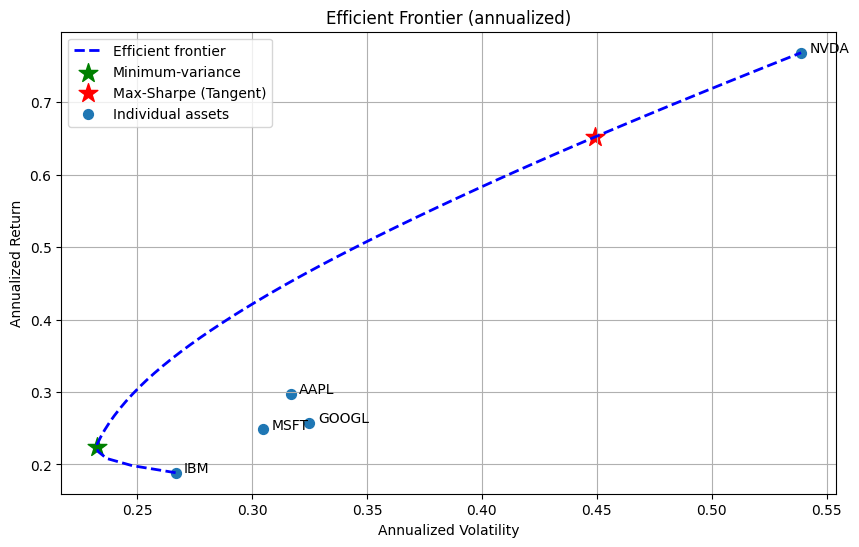

In [17]:
# Markowitz portfolio implementation (efficient frontier, min-variance, max-Sharpe)
# Requirements: yfinance, numpy, pandas, matplotlib, scipy
# pip install yfinance numpy pandas matplotlib scipy

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# -------------------------
# Utilities
# -------------------------
def get_price_data(tickers, start, end, adjust_close=True, progress=False):
    """Download adjusted close prices for tickers using yfinance."""
    data = yf.download(list(tickers), start=start, end=end, progress=progress)
    if adjust_close:
        # If multi-ticker, yfinance returns 'Adj Close' as column level
        if 'Adj Close' in data.columns:
            prices = data['Close'].copy()
        else:
            prices = data['Close'].copy()  # fallback
    else:
        prices = data['Close'].copy()
    # Ensure DataFrame even for a single ticker
    if isinstance(prices, pd.Series):
        prices = prices.to_frame()
    prices.columns = [str(c) for c in prices.columns]
    return prices

def annualize_returns_and_cov(prices, trading_days=252):
    """Return annualized expected returns (arithmetic mean) and covariance."""
    # daily returns
    daily_ret = prices.pct_change().dropna(how='all')
    mu_daily = daily_ret.mean()
    cov_daily = daily_ret.cov()
    mu_annual = mu_daily * trading_days
    cov_annual = cov_daily * trading_days
    return mu_annual, cov_annual, daily_ret

def portfolio_performance(weights, mu, cov):
    """Return portfolio expected return and volatility given weights."""
    w = np.array(weights)
    port_return = np.dot(w, mu)
    port_vol = np.sqrt(w.T @ cov @ w)
    return port_return, port_vol

# -------------------------
# Optimization objective functions
# -------------------------
def minimize_volatility(weights, mu, cov):
    """Objective: portfolio volatility (to minimize)."""
    return portfolio_performance(weights, mu, cov)[1]

def negative_sharpe(weights, mu, cov, risk_free_rate=0.0):
    """Objective: negative Sharpe ratio (to minimize)."""
    ret, vol = portfolio_performance(weights, mu, cov)
    # Prevent division by zero
    if vol == 0:
        return 1e6
    return -(ret - risk_free_rate) / vol

# -------------------------
# Solvers
# -------------------------
def solve_min_variance(mu, cov, allow_short=False):
    n = len(mu)
    x0 = np.repeat(1/n, n)
    bounds = [(-1.0, 1.0)]*n if allow_short else [(0.0, 1.0)]*n
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    res = minimize(minimize_volatility, x0, args=(mu, cov),
                   method='SLSQP', bounds=bounds, constraints=constraints)
    return res.x, portfolio_performance(res.x, mu, cov), res

def solve_max_sharpe(mu, cov, risk_free_rate=0.0, allow_short=False):
    n = len(mu)
    x0 = np.repeat(1/n, n)
    bounds = [(-1.0, 1.0)]*n if allow_short else [(0.0, 1.0)]*n
    constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1})
    res = minimize(negative_sharpe, x0, args=(mu, cov, risk_free_rate),
                   method='SLSQP', bounds=bounds, constraints=constraints)
    return res.x, portfolio_performance(res.x, mu, cov), res

def efficient_frontier(mu, cov, points=50, allow_short=False):
    """Construct points on the efficient frontier by targeting returns."""
    n = len(mu)
    bounds = [(-1.0, 1.0)]*n if allow_short else [(0.0, 1.0)]*n
    results = []
    # target returns range between min individual asset return and max
    ret_min = min(mu)
    ret_max = max(mu)
    target_returns = np.linspace(ret_min, ret_max, points)
    for r_target in target_returns:
        x0 = np.repeat(1/n, n)
        constraints = [
            {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
            {'type': 'eq', 'fun': lambda x, r_target=r_target: np.dot(x, mu) - r_target}
        ]
        res = minimize(minimize_volatility, x0, args=(mu, cov),
                       method='SLSQP', bounds=bounds, constraints=constraints)
        if res.success:
            w = res.x
            ret, vol = portfolio_performance(w, mu, cov)
            results.append((ret, vol, w))
    # Return arrays
    rets = np.array([r for r, v, w in results])
    vols = np.array([v for r, v, w in results])
    weights = np.array([w for r, v, w in results])
    return rets, vols, weights

# -------------------------
# Example usage
# -------------------------
if __name__ == "__main__":
    # Example tickers (you can change)
    tickers = ['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'IBM']
    start = "2020-01-01"
    end = "2025-01-01"
    risk_free_rate = 0.045  # annual

    # 1) Get prices and compute mu, cov
    prices = get_price_data(tickers, start, end, progress=False)
    mu, cov, daily_ret = annualize_returns_and_cov(prices, trading_days=252)

    # 2) Minimum-variance portfolio (long-only)
    w_minvar, (ret_minvar, vol_minvar), res_minvar = solve_min_variance(mu, cov, allow_short=False)

    # 3) Maximum Sharpe (tangent) portfolio (long-only)
    w_tan, (ret_tan, vol_tan), res_tan = solve_max_sharpe(mu, cov, risk_free_rate, allow_short=False)

    # 4) Efficient frontier (long-only)
    ef_rets, ef_vols, ef_weights = efficient_frontier(mu, cov, points=60, allow_short=False)

    # Display results
    df_weights = pd.DataFrame({
        'Ticker': list(mu.index),
        'Expected Return (ann)': mu.values,
        'MinVar Weight': w_minvar,
        'Tangent Weight': w_tan
    }).set_index('Ticker')

    print("\nExpected annual returns (mu):")
    print(mu.round(4))
    print("\nMin-variance portfolio:")
    print(f"Return: {ret_minvar:.4f}, Volatility: {vol_minvar:.4f}")
    print(df_weights[['Expected Return (ann)', 'MinVar Weight', 'Tangent Weight']])

    # Compute Sharpe of tangent
    sharpe_tan = (ret_tan - risk_free_rate) / vol_tan
    print(f"\nTangent portfolio -> Return: {ret_tan:.4f}, Vol: {vol_tan:.4f}, Sharpe: {sharpe_tan:.4f}")

    # Plot efficient frontier + min-var + tangent
    plt.figure(figsize=(10, 6))
    plt.plot(ef_vols, ef_rets, 'b--', lw=2, label='Efficient frontier')
    plt.scatter(vol_minvar, ret_minvar, marker='*', s=200, label='Minimum-variance', color='green')
    plt.scatter(vol_tan, ret_tan, marker='*', s=200, label='Max-Sharpe (Tangent)', color='red')
    # plot individual assets
    indiv_vol = np.sqrt(np.diag(cov))
    plt.scatter(indiv_vol, mu, marker='o', s=50, label='Individual assets')
    for i, t in enumerate(mu.index):
        plt.annotate(t, (indiv_vol[i], mu[i]), xytext=(6,0), textcoords='offset points')
    plt.title('Efficient Frontier (annualized)')
    plt.xlabel('Annualized Volatility')
    plt.ylabel('Annualized Return')
    plt.legend()
    plt.grid(True)
    plt.show()
